## Expt.-6: Classification of Credit Card Default Risk using Support Vector Machine
### Tanvi Santosh Patil Roll No:53

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,accuracy_score

In [26]:
data = pd.read_csv("credit.csv", skiprows=1)
data = data.sample(5000,random_state=42)

In [27]:
print(data.columns)

Index(['ID', 'LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [28]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
GENDER                        0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [29]:
data.describe()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000
mean,14914.170200,167192.000000,1.596600,1.855200,1.550000,35.395000,-0.011000,-0.137600,-0.157200,-0.221000,-0.269400,-0.302800,52271.123400,50111.172400,47878.135400,44272.255000,41011.468000,39336.039200,5556.689400,5596.743000,5050.37060,4722.326600,4751.23760,5465.348600,0.222600
std,8552.697261,128399.113714,0.490629,0.778431,0.517642,9.130063,1.109381,1.198897,1.219338,1.172874,1.135025,1.140075,73812.869455,71324.988008,68868.081558,64971.997836,61007.743435,60370.522115,13511.851832,16419.265474,14022.48402,13167.023137,14183.13024,19247.399693,0.416033
min,7.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-14386.000000,-13543.000000,-5000.000000,-9157.000000,-61372.000000,-339603.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
25%,7599.500000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3751.750000,2954.250000,2526.500000,2298.750000,1740.000000,1126.500000,978.750000,711.250000,396.00000,310.000000,257.75000,126.750000,0.000000
50%,14758.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23116.500000,21534.000000,20350.500000,19327.500000,18296.000000,16882.500000,2200.000000,2008.000000,1860.00000,1600.000000,1501.50000,1500.000000,0.000000
75%,22334.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69557.750000,66934.250000,63820.500000,56629.000000,50999.500000,49784.750000,5018.250000,5000.000000,4584.75000,4200.000000,4080.00000,4185.000000,0.000000
max,30000.000000,800000.000000,2.000000,6.000000,3.000000,72.000000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,653062.000000,671563.000000,689627.000000,706864.000000,489200.000000,527566.000000,272817.000000,384986.000000,344261.00000,330982.000000,303512.00000,528666.000000,1.000000


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 2308 to 4110
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          5000 non-null   int64
 1   LIMIT_BAL                   5000 non-null   int64
 2   GENDER                      5000 non-null   int64
 3   EDUCATION                   5000 non-null   int64
 4   MARRIAGE                    5000 non-null   int64
 5   AGE                         5000 non-null   int64
 6   PAY_0                       5000 non-null   int64
 7   PAY_2                       5000 non-null   int64
 8   PAY_3                       5000 non-null   int64
 9   PAY_4                       5000 non-null   int64
 10  PAY_5                       5000 non-null   int64
 11  PAY_6                       5000 non-null   int64
 12  BILL_AMT1                   5000 non-null   int64
 13  BILL_AMT2                   5000 non-null   int64
 14  BILL_AMT3 

In [31]:
y = data["default payment next month"]
x = data[["BILL_AMT1","BILL_AMT2"]]

print(x.dtypes)
print(x.head())

BILL_AMT1    int64
BILL_AMT2    int64
dtype: object
       BILL_AMT1  BILL_AMT2
2308        8864      10062
22404     136736     125651
23397      70122      69080
25058      20678      18956
2664       94228      47635


In [32]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state = 42)

In [33]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [41]:
models = {
    "Linear SVM ": SVC(kernel='linear', C= 1, class_weight='balanced'),
    "Polynomial SVM" : SVC (kernel='poly',
                           degree=2,
                            C=1,gamma='scale',
                            class_weight='balanced'
                        ),

    "RBF SVM" : SVC(kernel = 'rbf',
                    C=5,
                    gamma = 0.1,
                    class_weight = 'balanced'
                   
                   )
}

for name, model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)

    print("\n",name)
    print("Confusion Matrix",confusion_matrix(y_test,y_pred))
    print("precision score",precision_score(y_test,y_pred, zero_division=0))
    print("recall score",recall_score(y_test,y_pred))
    print("f1 score",f1_score(y_test,y_pred))  
    print("Accuracy score:", accuracy_score(y_test,y_pred))
    print("Accuracy score:",accuracy_score(y_train,y_pred_train))


 Linear SVM 
Confusion Matrix [[ 103 1056]
 [  34  307]]
precision score 0.2252384446074835
recall score 0.9002932551319648
f1 score 0.36032863849765256
Accuracy score: 0.2733333333333333
Accuracy score: 0.2797142857142857

 Polynomial SVM
Confusion Matrix [[  35 1124]
 [   8  333]]
precision score 0.22855181880576528
recall score 0.9765395894428153
f1 score 0.3704115684093437
Accuracy score: 0.24533333333333332
Accuracy score: 0.24114285714285713

 RBF SVM
Confusion Matrix [[560 599]
 [166 175]]
precision score 0.22609819121447028
recall score 0.5131964809384164
f1 score 0.31390134529147984
Accuracy score: 0.49
Accuracy score: 0.5017142857142857


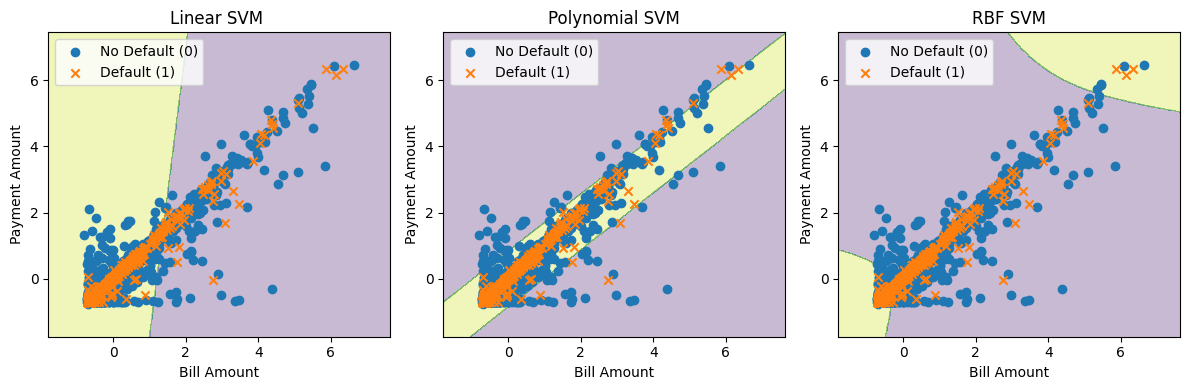

In [44]:
def plot_boundary(model, title):
    h = 0.02

    x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)

    # class 0
    plt.scatter(
        x_train[y_train == 0, 0],
        x_train[y_train == 0, 1],
        label='No Default (0)',
        marker='o'
    )

    # class 1
    plt.scatter(
        x_train[y_train == 1, 0],
        x_train[y_train == 1, 1],
        label='Default (1)',
        marker='x'
    )

    plt.legend()
    plt.title(title)
    plt.xlabel("Bill Amount")
    plt.ylabel("Payment Amount")


plt.figure(figsize=(12, 4))

for i, (name, model) in enumerate(models.items()):
    plt.subplot(1, 3, i + 1)
    model.fit(x_train, y_train)
    plot_boundary(model, name)

plt.tight_layout()
plt.show()